In [83]:
#%matplotlib notebook
import math

# path = "image/img_elias/E2/P3/"
path = "../../test/test2/RIE/training2/step_afm/pattern1/"
xVal = []
yVal = []
f = open(path + "data.txt", "r")
iterator = 0
for line in f:
    if iterator == 0:
        iterator += 1
        continue
    coord = line.split(' ')
    x = coord[0]
    e = x.find('e')
    if e == -1 :
        x_decimal = float(x)
        x_power = 0
    else :
        x_decimal = float(x[:e])
        x_power = 6 - int(x[e + 4])
    x_number = x_decimal * math.pow(10, x_power)
    y = coord[2]
    e = y.find('e')
    if e == -1 :
        y_decimal = float(y)
        y_power = 0
    else :
        y_decimal = float(y[:e])
        y_power = 9 - int(y[e + 2:e + 5])
    y_number = y_decimal * math.pow(10, y_power)
    iterator += 1
    xVal.append(round(x_number, 2))
    yVal.append(round(y_number, 2))
    

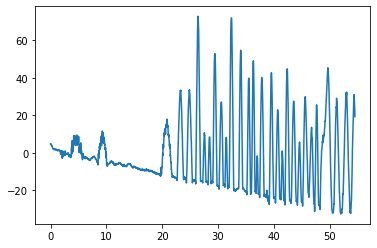

In [84]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(xVal, yVal)

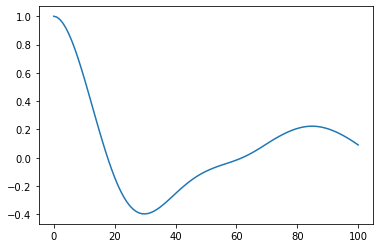

In [85]:
def autocorr(f):
    maxShift = 100
    size = len(f)
    x = range(maxShift + 1)
    y = np.zeros((len(x),))
    valMax = np.sum(np.multiply(f, f))
    for shift in x:
        y[shift] = np.sum(np.multiply(f[:size - shift], f[shift:size])) / valMax
    return y

autocorr_y = autocorr(yVal)
plt.plot(autocorr_y)

In [86]:
period = np.argmax(autocorr_y[20:])
period = 500
print(period)

500


In [87]:
def moyenneMobile(f, window):
    demiWindow = window / 2
    if demiWindow == int(demiWindow):
        extremeMin = - int(demiWindow)
        extremeMax = int(demiWindow - 1)
    else:
        demiWindow = int(demiWindow)
        extremeMin = - demiWindow
        extremeMax = demiWindow
    size = len(f)
    newF = np.zeros((size,))
    for i in np.arange(demiWindow, size - extremeMax):
        newF[int(i)] = sum(f[int(i + extremeMin):int(i + extremeMax)]) / (extremeMax - extremeMin)
    return newF

newY = moyenneMobile(yVal, period)

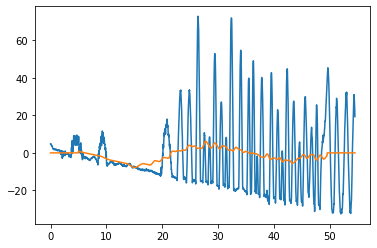

14.05973947895791


In [88]:
plt.figure()
plt.plot(xVal, yVal)
plt.plot(xVal, newY)
plt.show()
step = max(newY[int(period/2):-int(period/2)]) - min(newY[int(period/2):-int(period/2)])
print(step)

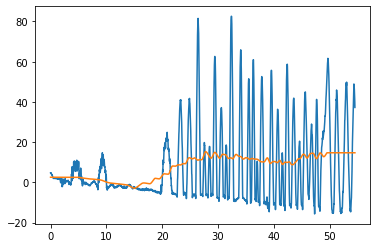

18.24641078156312


In [89]:
shift = 1000
slope = (newY[-int(period/2)] - newY[-int(period/2) - shift]) / shift
# slope = (newY[0 + int(period/2)] - newY[shift - 1 + int(period/2)]) / shift
def correct_slope(f, slope):
    size = len(f)
    newF = np.copy(f)
    for i in np.arange(1, size):
        newF[i] = newF[i] - i * slope
    return newF

def pad(f, window):
    val1 = f[window]
    val2 = f[-window - 1]
    for i in range(window):
        f[i] = val1
        f[-i - 1] = val2
    return f

correctedNewY = pad(correct_slope(newY, slope), int(period/2))
correctedY = correct_slope(yVal, slope)
plt.figure()
plt.plot(xVal, correctedY)
plt.plot(xVal, correctedNewY)
plt.show()
step = max(correctedNewY[int(period/2):-int(period/2)]) - min(correctedNewY[int(period/2):-int(period/2)])
print(step)

In [82]:
txt = 'var data = [];\n'
txt += 'function Points(x, y1, y2) {\n'
txt += '\tthis.x = x;\n'
txt += '\tthis.y1 = y1;\n'
txt += '\tthis.y2 = y2;\n'
txt += '}\n'
txt += '\n'

for i in range(len(xVal)):
    txt += 'data[' + str(i) + '] = new Points(' + str(xVal[i]) + ', ' + str(correctedNewY[i]) + ', ' + str(correctedY[i]) + ');\n'
f= open(path + "script_filtered.js","w+")
f.write(txt)
f.close()